<a href="https://colab.research.google.com/github/senu2000/NLP-for-spam-classification/blob/main/NLP_for_spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 - Reaading data and visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import nltk

In [3]:
df = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


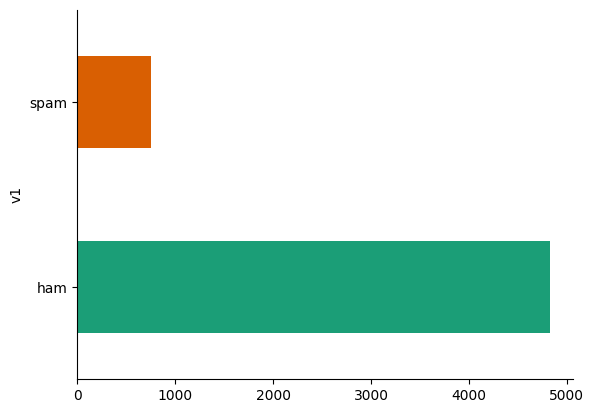

In [5]:
# @title v1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
df.shape

(5572, 5)

In [10]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.rename(columns={'v1':'class', 'v2':'sms'}, inplace=True)
df.sample(5) # for random sample

,class,sms
5239,ham,"Jay wants to work out first, how's 4 sound?"
2349,ham,Yar else i'll thk of all sorts of funny things.
4954,ham,Doing my masters. When will you buy a bb cos i...
2103,ham,Its a site to simulate the test. It just gives...
3158,ham,Are you up for the challenge? I know i am :)


In [14]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

Data visualization

In [17]:
df['length'] = df['sms'].apply(len)

<ipython-input-17-4005b6e77068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['sms'].apply(len)


In [19]:
df.head()

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

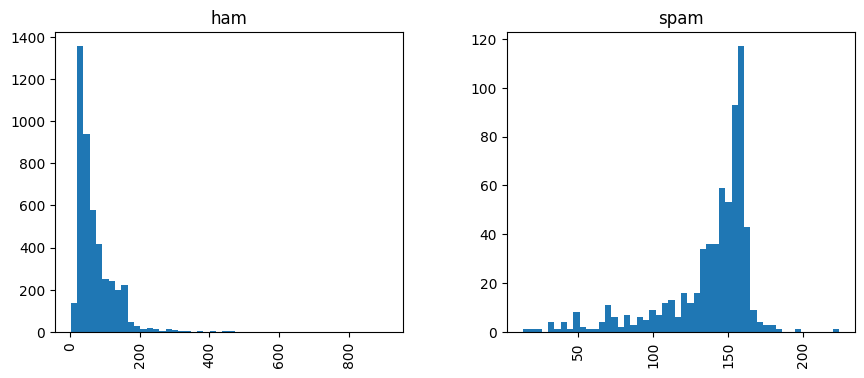

In [23]:
df.hist(column='length', by='class', bins=50, figsize=(10,4))

# Step 2 - Preprocessing

In [25]:
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
nltk.download('stopwords')

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [28]:
df.head() # data before preprocessing

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessing task -
1. lowercase
2. tokenization
3. remove special characters
4. remove stop words and punctuations
5. stemming

In [29]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [30]:
df['sms_cleaned'] = df['sms'].apply(clean_text)

<ipython-input-30-c7d534ff2b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms_cleaned'] = df['sms'].apply(clean_text)


In [31]:
df.head()

,class,sms,length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


# step 3 - feature extraction

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
tf_vec = TfidfVectorizer(max_features=3000)
x = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [34]:
x.shape

(5169, 3000)

In [35]:
Y = df['class'].values

# step 4 - Learning

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=2)

In [37]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9709864603481625
